In [2]:
import joblib
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Importing libraries
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,BaggingClassifier,HistGradientBoostingClassifier)
from sklearn.metrics import accuracy_score

# Metrics and evaluation tools
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import roc_curve, auc

#
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

from tqdm.notebook import tqdm  # Para notebooks como Kaggle/Colab
from IPython.display import display

In [6]:
df = pd.read_csv(r"C:\Users\pdm\Downloads\autoinsurance_churn.csv\autoinsurance_churn.csv")
df

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,2.213000e+11,5.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,32.578829,-96.305006,Kaufman,...,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,NaN,0
1,2.213001e+11,5.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,32.732209,-97.000893,Grand Prairie,...,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,NaN,0
2,2.213007e+11,5.213002e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,32.819777,-96.846938,Dallas,...,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,NaN,0
3,2.213016e+11,5.213006e+11,992.409561,130.0,2022-07-25,53,1969-05-25,32.684065,-97.162180,Arlington,...,125000.0,1.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,2021-12-22,1
4,2.213016e+11,5.213006e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,32.751398,-97.376745,Fort Worth,...,87500.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680904,2.213007e+11,5.213002e+11,1259.900413,803.0,2020-09-20,55,1967-07-07,32.678483,-96.665119,Dallas,...,27500.0,1.0,3.0,Single,50000 - 74999,1.0,0.0,1.0,NaN,0
1680905,2.213015e+11,5.213005e+11,604.096865,3261.0,2013-12-28,77,1945-07-01,32.972007,-96.688905,Richardson,...,87500.0,0.0,1.0,Married,125000 - 149999,1.0,0.0,1.0,NaN,0
1680906,2.213026e+11,5.213009e+11,1255.570597,3403.0,2013-08-08,41,1981-09-22,32.902815,-96.510684,Rowlett,...,125000.0,0.0,12.0,Married,125000 - 149999,1.0,1.0,1.0,NaN,0
1680907,2.213008e+11,5.213003e+11,1104.105051,1258.0,2019-06-23,52,1970-07-26,32.892940,-97.245317,Keller,...,87500.0,1.0,11.0,Single,75000 - 99999,1.0,1.0,1.0,NaN,0


In [7]:
df.shape

(1680909, 22)

In [8]:
df.head()

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,2.213000e+11,5.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,32.578829,-96.305006,Kaufman,...,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,NaN,0
1,2.213001e+11,5.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,32.732209,-97.000893,Grand Prairie,...,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,NaN,0
2,2.213007e+11,5.213002e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,32.819777,-96.846938,Dallas,...,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,NaN,0
3,2.213016e+11,5.213006e+11,992.409561,130.0,2022-07-25,53,1969-05-25,32.684065,-97.162180,Arlington,...,125000.0,1.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,2021-12-22,1
4,2.213016e+11,5.213006e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,32.751398,-97.376745,Fort Worth,...,87500.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,NaN,0


In [9]:
df.tail()

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
1680904,2.213007e+11,5.213002e+11,1259.900413,803.0,2020-09-20,55,1967-07-07,32.678483,-96.665119,Dallas,...,27500.0,1.0,3.0,Single,50000 - 74999,1.0,0.0,1.0,NaN,0
1680905,2.213015e+11,5.213005e+11,604.096865,3261.0,2013-12-28,77,1945-07-01,32.972007,-96.688905,Richardson,...,87500.0,0.0,1.0,Married,125000 - 149999,1.0,0.0,1.0,NaN,0
1680906,2.213026e+11,5.213009e+11,1255.570597,3403.0,2013-08-08,41,1981-09-22,32.902815,-96.510684,Rowlett,...,125000.0,0.0,12.0,Married,125000 - 149999,1.0,1.0,1.0,NaN,0
1680907,2.213008e+11,5.213003e+11,1104.105051,1258.0,2019-06-23,52,1970-07-26,32.892940,-97.245317,Keller,...,87500.0,1.0,11.0,Single,75000 - 99999,1.0,1.0,1.0,NaN,0
1680908,2.213016e+11,5.213006e+11,829.869558,2504.0,2016-01-24,64,1959-04-29,33.146851,-96.968217,Little Elm,...,225000.0,1.0,4.0,Married,200000 - 224999,1.0,0.0,1.0,NaN,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float64
 1   address_id           1680909 non-null  float64
 2   curr_ann_amt         1680909 non-null  float64
 3   days_tenure          1680909 non-null  float64
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float64
 8   longitude            1427190 non-null  float64
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float64
 13  has_children         1680909 non-null  float64
 14  length_of_residence  1680909 non-null  float64
 15

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
individual_id,1680909.0,2.213018e+11,992632.690341,2.213000e+11,2.213009e+11,2.213018e+11,2.213027e+11,2.213033e+11
address_id,1680909.0,5.213007e+11,417471.090040,5.213000e+11,5.213003e+11,5.213007e+11,5.213010e+11,5.213015e+11
curr_ann_amt,1680909.0,9.403140e+02,246.539206,-1.943131e+02,7.721025e+02,9.350098e+02,1.102992e+03,2.269374e+03
days_tenure,1680909.0,3.602007e+03,2341.004778,2.000000e+01,1.398000e+03,3.651000e+03,6.291000e+03,6.291000e+03
age_in_years,1680909.0,5.581648e+01,14.551923,2.300000e+01,4.500000e+01,5.500000e+01,6.400000e+01,1.140000e+02
latitude,1427190.0,3.285130e+01,0.194446,3.199061e+01,3.271247e+01,3.284678e+01,3.298491e+01,3.354658e+01
longitude,1427190.0,-9.694764e+01,0.296373,-9.802223e+01,-9.716765e+01,-9.690326e+01,-9.672065e+01,-9.607035e+01
income,1680909.0,8.149773e+04,54381.000742,5.000000e+03,4.750000e+04,7.000000e+04,8.750000e+04,2.500000e+05
has_children,1680909.0,5.221336e-01,0.499510,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
length_of_residence,1680909.0,7.501612e+00,5.135309,0.000000e+00,3.000000e+00,6.801000e+00,1.300000e+01,1.500000e+01


## Handle missing values

### Subtask:
Identify and address missing values in the dataset.

**Reasoning**:
Calculate the percentage of missing values for each column and identify columns with high missing percentages.

In [13]:
missing_percentages = df.isnull().sum() / len(df) * 100
print("Percentage of missing values per column:")
print(missing_percentages)

high_missing_cols = missing_percentages[missing_percentages > 50].index.tolist()
print("\nColumns with high missing percentage ( > 50% ):")
print(high_missing_cols)

Percentage of missing values per column:
individual_id           0.000000
address_id              0.000000
curr_ann_amt            0.000000
days_tenure             0.000000
cust_orig_date          0.000000
age_in_years            0.000000
date_of_birth           0.000000
latitude               15.094154
longitude              15.094154
city                    0.717885
state                   0.000000
county                  0.717885
income                  0.000000
has_children            0.000000
length_of_residence     0.000000
marital_status          0.000000
home_market_value       5.490244
home_owner              0.000000
college_degree          0.000000
good_credit             0.000000
acct_suspd_date        88.490989
Churn                   0.000000
dtype: float64

Columns with high missing percentage ( > 50% ):
['acct_suspd_date']


**Reasoning**:
Drop the column with a high percentage of missing values and impute missing values for columns with low to moderate missing percentages.

In [14]:
df_cleaned = df.drop(columns=high_missing_cols)

# Impute missing values for other columns
# latitude and longitude are numerical, impute with median
df_cleaned['latitude'] = df_cleaned['latitude'].fillna(df_cleaned['latitude'].median())
df_cleaned['longitude'] = df_cleaned['longitude'].fillna(df_cleaned['longitude'].median())

# city and county are categorical, impute with mode
df_cleaned['city'] = df_cleaned['city'].fillna(df_cleaned['city'].mode()[0])
df_cleaned['county'] = df_cleaned['county'].fillna(df_cleaned['county'].mode()[0])

# home_market_value is categorical, impute with mode
df_cleaned['home_market_value'] = df_cleaned['home_market_value'].fillna(df_cleaned['home_market_value'].mode()[0])

# Verify that missing values have been handled
print("\nMissing values after handling:")
print(df_cleaned.isnull().sum())


Missing values after handling:
individual_id          0
address_id             0
curr_ann_amt           0
days_tenure            0
cust_orig_date         0
age_in_years           0
date_of_birth          0
latitude               0
longitude              0
city                   0
state                  0
county                 0
income                 0
has_children           0
length_of_residence    0
marital_status         0
home_market_value      0
home_owner             0
college_degree         0
good_credit            0
Churn                  0
dtype: int64


# Task
Clean the dataset by handling missing values, outliers, duplicates, and inconsistent data. Perform feature engineering, data type conversion, and categorical data encoding. Normalize/scale the data and apply PCA.

## Handle missing values

### Subtask:
Identify and address missing values in the dataset.


**Reasoning**:
Calculate the percentage of missing values for each column and identify columns with high missing percentages.



In [15]:
missing_percentages = df.isnull().sum() / len(df) * 100
print("Percentage of missing values per column:")
print(missing_percentages)

high_missing_cols = missing_percentages[missing_percentages > 50].index.tolist()
print("\nColumns with high missing percentage ( > 50% ):")
print(high_missing_cols)

Percentage of missing values per column:
individual_id           0.000000
address_id              0.000000
curr_ann_amt            0.000000
days_tenure             0.000000
cust_orig_date          0.000000
age_in_years            0.000000
date_of_birth           0.000000
latitude               15.094154
longitude              15.094154
city                    0.717885
state                   0.000000
county                  0.717885
income                  0.000000
has_children            0.000000
length_of_residence     0.000000
marital_status          0.000000
home_market_value       5.490244
home_owner              0.000000
college_degree          0.000000
good_credit             0.000000
acct_suspd_date        88.490989
Churn                   0.000000
dtype: float64

Columns with high missing percentage ( > 50% ):
['acct_suspd_date']


**Reasoning**:
Drop the column with a high percentage of missing values and impute missing values for columns with low to moderate missing percentages.



In [16]:
df_cleaned = df.drop(columns=high_missing_cols)

# Impute missing values for other columns
# latitude and longitude are numerical, impute with median
df_cleaned['latitude'].fillna(df_cleaned['latitude'].median(), inplace=True)
df_cleaned['longitude'].fillna(df_cleaned['longitude'].median(), inplace=True)

# city and county are categorical, impute with mode
df_cleaned['city'].fillna(df_cleaned['city'].mode()[0], inplace=True)
df_cleaned['county'].fillna(df_cleaned['county'].mode()[0], inplace=True)

# home_market_value is categorical, impute with mode
df_cleaned['home_market_value'].fillna(df_cleaned['home_market_value'].mode()[0], inplace=True)

# Verify that missing values have been handled
print("\nMissing values after handling:")
print(df_cleaned.isnull().sum())

C:\Users\pdm\AppData\Local\Temp\ipykernel_2696\2424151032.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['latitude'].fillna(df_cleaned['latitude'].median(), inplace=True)
C:\Users\pdm\AppData\Local\Temp\ipykernel_2696\2424151032.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav


Missing values after handling:
individual_id          0
address_id             0
curr_ann_amt           0
days_tenure            0
cust_orig_date         0
age_in_years           0
date_of_birth          0
latitude               0
longitude              0
city                   0
state                  0
county                 0
income                 0
has_children           0
length_of_residence    0
marital_status         0
home_market_value      0
home_owner             0
college_degree         0
good_credit            0
Churn                  0
dtype: int64


## Handle outliers

### Subtask:
Detect and manage outliers in numerical features.


**Reasoning**:
Identify numerical columns, calculate IQR, and determine outlier bounds for each to prepare for outlier handling.



In [17]:
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Churn') # Exclude the target variable
print(f"Numerical columns: {numerical_cols}")

outlier_info = {}
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)].shape[0]
    outlier_info[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': outliers_count
    }

    print(f"Column: {col}")
    print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"  Number of Outliers: {outliers_count}")


Numerical columns: ['individual_id', 'address_id', 'curr_ann_amt', 'days_tenure', 'age_in_years', 'latitude', 'longitude', 'income', 'has_children', 'length_of_residence', 'home_owner', 'college_degree', 'good_credit']
Column: individual_id
  Q1: 221300905556.0, Q3: 221302711304.0, IQR: 1805748.0
  Lower Bound: 221298196934.0, Upper Bound: 221305419926.0
  Number of Outliers: 0
Column: address_id
  Q1: 521300332982.0, Q3: 521300982572.0, IQR: 649590.0
  Lower Bound: 521299358597.0, Upper Bound: 521301956957.0
  Number of Outliers: 0
Column: curr_ann_amt
  Q1: 772.102493, Q3: 1102.992246, IQR: 330.88975300000004
  Lower Bound: 275.7678634999999, Upper Bound: 1599.3268755000001
  Number of Outliers: 13241
Column: days_tenure
  Q1: 1398.0, Q3: 6291.0, IQR: 4893.0
  Lower Bound: -5941.5, Upper Bound: 13630.5
  Number of Outliers: 0
Column: age_in_years
  Q1: 45.0, Q3: 64.0, IQR: 19.0
  Lower Bound: 16.5, Upper Bound: 92.5
  Number of Outliers: 23272
Column: latitude
  Q1: 32.732787, Q3: 32

**Reasoning**:
Cap the outliers in the identified numerical columns using the calculated lower and upper bounds.



In [18]:
for col, info in outlier_info.items():
    lower_bound = info['lower_bound']
    upper_bound = info['upper_bound']
    df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
    df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])

print("Outliers have been capped in the numerical columns.")

Outliers have been capped in the numerical columns.


**Reasoning**:
Verify that the capping was successful by re-calculating the number of outliers after capping.



In [19]:
for col, info in outlier_info.items():
    lower_bound = info['lower_bound']
    upper_bound = info['upper_bound']

    outliers_count_after_capping = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)].shape[0]

    print(f"Column: {col}")
    print(f"  Number of Outliers After Capping: {outliers_count_after_capping}")


Column: individual_id
  Number of Outliers After Capping: 0
Column: address_id
  Number of Outliers After Capping: 0
Column: curr_ann_amt
  Number of Outliers After Capping: 0
Column: days_tenure
  Number of Outliers After Capping: 0
Column: age_in_years
  Number of Outliers After Capping: 0
Column: latitude
  Number of Outliers After Capping: 0
Column: longitude
  Number of Outliers After Capping: 0
Column: income
  Number of Outliers After Capping: 0
Column: has_children
  Number of Outliers After Capping: 0
Column: length_of_residence
  Number of Outliers After Capping: 0
Column: home_owner
  Number of Outliers After Capping: 0
Column: college_degree
  Number of Outliers After Capping: 0
Column: good_credit
  Number of Outliers After Capping: 0


## Handle duplicate data

### Subtask:
Identify and remove duplicate rows.


**Reasoning**:
Identify and count duplicate rows in the DataFrame.



In [20]:
duplicate_rows = df_cleaned.duplicated()
n_duplicates = duplicate_rows.sum()

print(f"Number of duplicate rows: {n_duplicates}")

Number of duplicate rows: 0


## Feature engineering

### Subtask:
Create new features or transform existing ones to improve model performance.


**Reasoning**:
Convert date columns to datetime objects, calculate policy tenure, extract origination year, calculate age at origination, and drop the original date columns.



In [21]:
df_cleaned['cust_orig_date'] = pd.to_datetime(df_cleaned['cust_orig_date'])
df_cleaned['date_of_birth'] = pd.to_datetime(df_cleaned['date_of_birth'])
df_cleaned['policy_tenure'] = df_cleaned['days_tenure'] / 365.25
df_cleaned['origination_year'] = df_cleaned['cust_orig_date'].dt.year
df_cleaned['age_at_origination'] = df_cleaned['origination_year'] - df_cleaned['date_of_birth'].dt.year
df_cleaned = df_cleaned.drop(columns=['cust_orig_date', 'date_of_birth', 'days_tenure'])
df_cleaned.head()

,individual_id,address_id,curr_ann_amt,age_in_years,latitude,longitude,city,state,county,income,...,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn,policy_tenure,origination_year,age_at_origination
0,2.213000e+11,5.213000e+11,818.877997,44.0,32.578829,-96.305006,Kaufman,TX,Kaufman,22500.0,...,15.0,Married,50000 - 74999,1.0,1.0,1.0,0,3.980835,2018,40
1,2.213001e+11,5.213001e+11,974.199182,72.0,32.732209,-97.000893,Grand Prairie,TX,Dallas,27500.0,...,2.0,Single,50000 - 74999,1.0,0.0,1.0,0,4.914442,2018,68
2,2.213007e+11,5.213002e+11,967.375112,55.0,32.819777,-96.846938,Dallas,TX,Dallas,42500.0,...,10.0,Married,75000 - 99999,1.0,0.0,1.0,0,13.190965,2009,42
3,2.213016e+11,5.213006e+11,992.409561,53.0,32.684065,-97.162180,Arlington,TX,Tarrant,125000.0,...,6.0,Married,175000 - 199999,1.0,0.0,1.0,1,0.355921,2022,53
4,2.213016e+11,5.213006e+11,784.633494,50.0,32.751398,-97.376745,Fort Worth,TX,Tarrant,87500.0,...,4.0,Married,225000 - 249999,1.0,1.0,1.0,0,16.142368,2006,34


In [22]:
# Feature Engineering based on the provided table

# 1. Tenure and Loyalty Features
# loyalty_segment
bins = [0, 365, 1825, np.inf] # New: <1yr, Established: 1-5yrs, Loyal: >5yrs
labels = ['New', 'Established', 'Loyal']
df_cleaned['loyalty_segment'] = pd.cut(df_cleaned['policy_tenure'] * 365.25, bins=bins, labels=labels, right=False)

# is_renewal_window (assuming policy anniversary is based on days_tenure and current date is implied)
# This feature is difficult to create without a reference "current date".
# Assuming "current" is relative to the latest date in the dataset or a fixed point.
# Let's assume a simplified approach: is within 30-90 days before the end of the tenure period (which is not ideal without a reference date)
# A better approach would be to calculate days remaining until next anniversary based on cust_orig_date and a reference date.
# Given the data, let's create a placeholder or skip this for now, or make a simplifying assumption.
# Let's assume the 'days_tenure' represents the duration until a potential churn event or observation point.
# A more realistic approach would require a current date.

# Skipping is_renewal_window and first_renewal for now due to lack of a 'current date' reference point in the dataset.
# If a 'current_date' was available, we could calculate days to next anniversary and check if within 30-90 days.

# 2. Financial and Economic Features
# premium_to_income_ratio
df_cleaned['premium_to_income_ratio'] = df_cleaned['curr_ann_amt'] / df_cleaned['income']

# premium_affordability_segment
# Define bins and labels based on the distribution of premium_to_income_ratio (needs analysis of the ratio distribution first)
# For now, using example bins and labels:
bins_affordability = [0, 0.01, 0.05, np.inf] # Example thresholds
labels_affordability = ['Low', 'Medium', 'High']
df_cleaned['premium_affordability_segment'] = pd.cut(df_cleaned['premium_to_income_ratio'], bins=bins_affordability, labels=labels_affordability, right=False)


# home_value_cleaned
# Assuming 'home_market_value' format is consistent like "X - Y" or "X Plus" or "X - Y"
def clean_home_value(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        if 'Plus' in value:
            return int(value.split(' ')[0]) # Take the lower bound for 'Plus' categories
        elif '-' in value:
            try:
                lower, upper = value.split(' - ')
                return (int(lower) + int(upper)) / 2
            except ValueError:
                return np.nan
        else:
             try:
                return float(value) # Handle single value cases if any
             except ValueError:
                 return np.nan
    return np.nan # Return NaN for unexpected formats

df_cleaned['home_value_cleaned'] = df_cleaned['home_market_value'].apply(clean_home_value)

# Impute missing values for home_value_cleaned after creation
df_cleaned['home_value_cleaned'] = df_cleaned['home_value_cleaned'].fillna(df_cleaned['home_value_cleaned'].median())


# wealth_indicator (example composite score)
# This requires defining a scoring logic. A simple approach could be summing scaled features.
# Let's normalize income, home_value_cleaned, and home_owner (already binary) and sum them.
scaler_wealth = StandardScaler()
df_cleaned[['income_scaled', 'home_value_cleaned_scaled']] = scaler_wealth.fit_transform(df_cleaned[['income', 'home_value_cleaned']])
df_cleaned['wealth_indicator'] = df_cleaned['income_scaled'] + df_cleaned['home_value_cleaned_scaled'] + df_cleaned['home_owner'] # Assuming home_owner is 0 or 1


# 3. Geographic and Demographic Features
# churn_rate_by_state (Requires 'state' and 'Churn' from the original or cleaned data)
churn_rate_state = df_cleaned.groupby('state')['Churn'].mean().reset_index()
churn_rate_state.rename(columns={'Churn': 'churn_rate_by_state'}, inplace=True)
df_cleaned = df_cleaned.merge(churn_rate_state, on='state', how='left')


# churn_rate_by_county (Requires 'county' and 'Churn')
churn_rate_county = df_cleaned.groupby('county')['Churn'].mean().reset_index()
churn_rate_county.rename(columns={'Churn': 'churn_rate_by_county'}, inplace=True)
df_cleaned = df_cleaned.merge(churn_rate_county, on='county', how='left')


# life_stage (Example categorization)
def categorize_life_stage(row):
    age = row['age_in_years']
    marital_status = row['marital_status']
    has_children = row['has_children']

    if age < 25:
        return 'Young Adult'
    elif age < 40:
        if has_children == 1:
            return 'Young Family'
        elif marital_status == 'Married':
            return 'Young Couple (No Kids)'
        else:
            return 'Young Single'
    elif age < 60:
        if has_children == 1: # Assuming 'children' here refers to children in the household, which might not be the case for older parents
             return 'Middle-aged Family' # This might need refinement based on data meaning of has_children
        elif marital_status == 'Married':
            return 'Middle-aged Couple (No Kids)'
        else:
            return 'Middle-aged Single'
    else:
        if marital_status == 'Married':
            return 'Older Couple'
        else:
            return 'Older Single'

df_cleaned['life_stage'] = df_cleaned.apply(categorize_life_stage, axis=1)


# is_urban_rural - This would require an external dataset mapping cities/counties to urban/rural classifications.
# Skipping this feature engineering step as external data is needed.

# 4. Date and Time-Based Features
# cust_orig_month (already created in previous steps, but regenerating based on the list)
# df_cleaned['cust_orig_month'] = pd.to_datetime(df_cleaned['cust_orig_date']).dt.month # cust_orig_date was dropped

# cust_orig_year (already created in previous steps, but regenerating based on the list)
# df_cleaned['cust_orig_year'] = pd.to_datetime(df_cleaned['cust_orig_date']).dt.year # cust_orig_date was dropped

# is_suspended (Requires 'acct_suspd_date'. This column was dropped due to high missing values.
# If we were to keep it and impute, we could create this feature.
# Assuming we re-include 'acct_suspd_date' and impute NaN with a placeholder or treat them as not suspended.
# As 'acct_suspd_date' was dropped, we cannot create this feature with the current df_cleaned.
# If we were to go back and not drop the column, then the code would be:
# df_cleaned['is_suspended'] = df_cleaned['acct_suspd_date'].notna().astype(int)

# Display the first few rows with new features
display(df_cleaned.head())

# Display info to see new columns and their types
df_cleaned.info()

,individual_id,address_id,curr_ann_amt,age_in_years,latitude,longitude,city,state,county,income,...,loyalty_segment,premium_to_income_ratio,premium_affordability_segment,home_value_cleaned,income_scaled,home_value_cleaned_scaled,wealth_indicator,churn_rate_by_state,churn_rate_by_county,life_stage
0,2.213000e+11,5.213000e+11,818.877997,44.0,32.578829,-96.305006,Kaufman,TX,Kaufman,22500.0,...,Established,0.036395,Medium,62499.5,-1.375727,-0.762614,-1.138342,0.11509,0.113517,Middle-aged Family
1,2.213001e+11,5.213001e+11,974.199182,72.0,32.732209,-97.000893,Grand Prairie,TX,Dallas,27500.0,...,Established,0.035425,Medium,62499.5,-1.244774,-0.762614,-1.007389,0.11509,0.114034,Older Single
2,2.213007e+11,5.213002e+11,967.375112,55.0,32.819777,-96.846938,Dallas,TX,Dallas,42500.0,...,Loyal,0.022762,Medium,87499.5,-0.851915,-0.478653,-0.330568,0.11509,0.114034,Middle-aged Couple (No Kids)
3,2.213016e+11,5.213006e+11,992.409561,53.0,32.684065,-97.162180,Arlington,TX,Tarrant,125000.0,...,New,0.007939,Low,187499.5,1.308810,0.657194,2.966004,0.11509,0.115550,Middle-aged Family
4,2.213016e+11,5.213006e+11,784.633494,50.0,32.751398,-97.376745,Fort Worth,TX,Tarrant,87500.0,...,Loyal,0.008967,Low,237499.5,0.326662,1.225117,2.551779,0.11509,0.115550,Middle-aged Family


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 31 columns):
 #   Column                         Non-Null Count    Dtype   
---  ------                         --------------    -----   
 0   individual_id                  1680909 non-null  float64 
 1   address_id                     1680909 non-null  float64 
 2   curr_ann_amt                   1680909 non-null  float64 
 3   age_in_years                   1680909 non-null  float64 
 4   latitude                       1680909 non-null  float64 
 5   longitude                      1680909 non-null  float64 
 6   city                           1680909 non-null  object  
 7   state                          1680909 non-null  object  
 8   county                         1680909 non-null  object  
 9   income                         1680909 non-null  float64 
 10  has_children                   1680909 non-null  float64 
 11  length_of_residence            1680909 non-null  float64 
 12  

## Data type conversion

### Subtask:
Ensure all columns have the appropriate data types.

**Reasoning**:
Examine the current data types of all columns in the df_cleaned DataFrame and identify any columns that need conversion.

In [23]:
print(df_cleaned.dtypes)

individual_id                     float64
address_id                        float64
curr_ann_amt                      float64
age_in_years                      float64
latitude                          float64
longitude                         float64
city                               object
state                              object
county                             object
income                            float64
has_children                      float64
length_of_residence               float64
marital_status                     object
home_market_value                  object
home_owner                        float64
college_degree                    float64
good_credit                       float64
Churn                               int64
policy_tenure                     float64
origination_year                    int32
age_at_origination                  int32
loyalty_segment                  category
premium_to_income_ratio           float64
premium_affordability_segment    c

**Reasoning**:
Convert the 'age_in_years', 'has_children', 'home_owner', 'college_degree', and 'good_credit' columns to integer type as they represent counts or binary values. Also, verify the data types after conversion.

In [24]:
df_cleaned['age_in_years'] = df_cleaned['age_in_years'].astype(int)
df_cleaned['has_children'] = df_cleaned['has_children'].astype(int)
df_cleaned['home_owner'] = df_cleaned['home_owner'].astype(int)
df_cleaned['college_degree'] = df_cleaned['college_degree'].astype(int)
df_cleaned['good_credit'] = df_cleaned['good_credit'].astype(int)

print(df_cleaned.dtypes)

individual_id                     float64
address_id                        float64
curr_ann_amt                      float64
age_in_years                        int32
latitude                          float64
longitude                         float64
city                               object
state                              object
county                             object
income                            float64
has_children                        int32
length_of_residence               float64
marital_status                     object
home_market_value                  object
home_owner                          int32
college_degree                      int32
good_credit                         int32
Churn                               int64
policy_tenure                     float64
origination_year                    int32
age_at_origination                  int32
loyalty_segment                  category
premium_to_income_ratio           float64
premium_affordability_segment    c

## Address Inconsistent Data

### Subtask:
Clean and standardize inconsistent data entries.

**Reasoning**:
Check for unique values in categorical columns to identify any inconsistencies.

In [25]:
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df_cleaned[col].unique())
    print("-" * 30)

Unique values in 'city':
['Kaufman' 'Grand Prairie' 'Dallas' 'Arlington' 'Fort Worth' 'Carrollton'
 'Allen' 'Bedford' 'The Colony' 'Mckinney' 'Irving' 'Mesquite' 'Hurst'
 'Garland' 'Sachse' 'Euless' 'Plano' 'Frisco' 'Grapevine' 'Cedar Hill'
 'Keller' 'Justin' 'Wylie' 'Aledo' 'Waxahachie' 'Seagoville'
 'North Richland Hills' 'Desoto' 'Roanoke' 'Southlake' 'Lancaster' 'Kemp'
 'Mansfield' 'Richardson' 'Rice' 'Caddo Mills' 'Red Oak' 'Weatherford'
 'Flower Mound' 'Denton' 'Ennis' 'Midlothian' 'Coppell' 'Sanger' 'Aubrey'
 'Burleson' 'Duncanville' 'Crowley' 'Rockwall' 'Rowlett' 'Colleyville'
 'Lewisville' 'Balch Springs' 'Argyle' 'Lake Dallas' 'Haslet' 'Terrell'
 'Forney' 'Haltom City' 'Azle' 'Addison' 'Italy' 'Springtown' 'Joshua'
 'Princeton' 'Anna' 'Little Elm' 'Crandall' 'Ponder' 'Royse City'
 'Valley View' 'Ferris' 'Scurry' 'Farmersville' 'Prosper' 'Kennedale'
 'Lavon' 'Sunnyvale' 'Celina' 'Pilot Point' 'Blue Ridge' 'Melissa'
 'Hutchins' 'Palmer' 'Wilmer' 'Krum' 'Tioga' 'Nevada' 'Maypear

In [26]:
df_cleaned.shape

(1680909, 31)

## Train XGBoost Model

### Subtask:
Train an XGBoost model on the preprocessed data.

**Reasoning**:
Prepare the data by separating features (X) and target variable (y), splitting the data into training and testing sets, and then train an XGBoost classifier on the training data.

In [27]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=43, stratify=y)

# Initialize and train XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

print("XGBoost model trained successfully!")

C:\Users\pdm\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [20:19:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully!


**Reasoning**:
Evaluate the performance of the trained XGBoost model on the test set using accuracy score.

In [28]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the XGBoost model: {accuracy}")

Accuracy of the XGBoost model: 0.8847983549521162


## Hyperparameter Tuning (Limited Search)

### Subtask:
Perform a limited hyperparameter search for the XGBoost model using GridSearchCV.

In [29]:
print(y.value_counts(normalize=True))

Churn
0    0.88491
1    0.11509
Name: proportion, dtype: float64


In [34]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)



   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imblearn]



In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Use optimized default params (based on typical churn problems)
xgb_model = XGBClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    reg_alpha=0.5,
    reg_lambda=1,
    scale_pos_weight=1,  # Change this if class imbalance exists
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)

# Predict & evaluate
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


C:\Users\pdm\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [20:21:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8826202622809921
ROC AUC: 0.6969477539476913

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93   1264335
           1       0.49      0.41      0.45    164438

    accuracy                           0.88   1428773
   macro avg       0.71      0.68      0.69   1428773
weighted avg       0.87      0.88      0.88   1428773



## Evaluate Precision for Churn (Class 1)

### Subtask:
Calculate and display the precision score specifically for the churn class (class 1).

**Reasoning**:
Calculate the precision score for the churn class (class 1) using the true labels and the model's predictions on the test set and display the precision score to confirm the low precision for churn cases.

In [ ]:
from sklearn.metrics import precision_score

# Calculate precision for class 1 (Churn)
precision_churn = precision_score(y_test, y_pred, pos_label=1)

print(f"Precision for Churn (Class 1): {precision_churn}")

Precision for Churn (Class 1): 0.48834689130026443


In [42]:
!pip install shap
import shap
import matplotlib.pyplot as plt

In [43]:
explainer = shap.TreeExplainer(xgb_model)

In [44]:
shap_values = explainer.shap_values(X_test)

Generating SHAP Summary Plot...


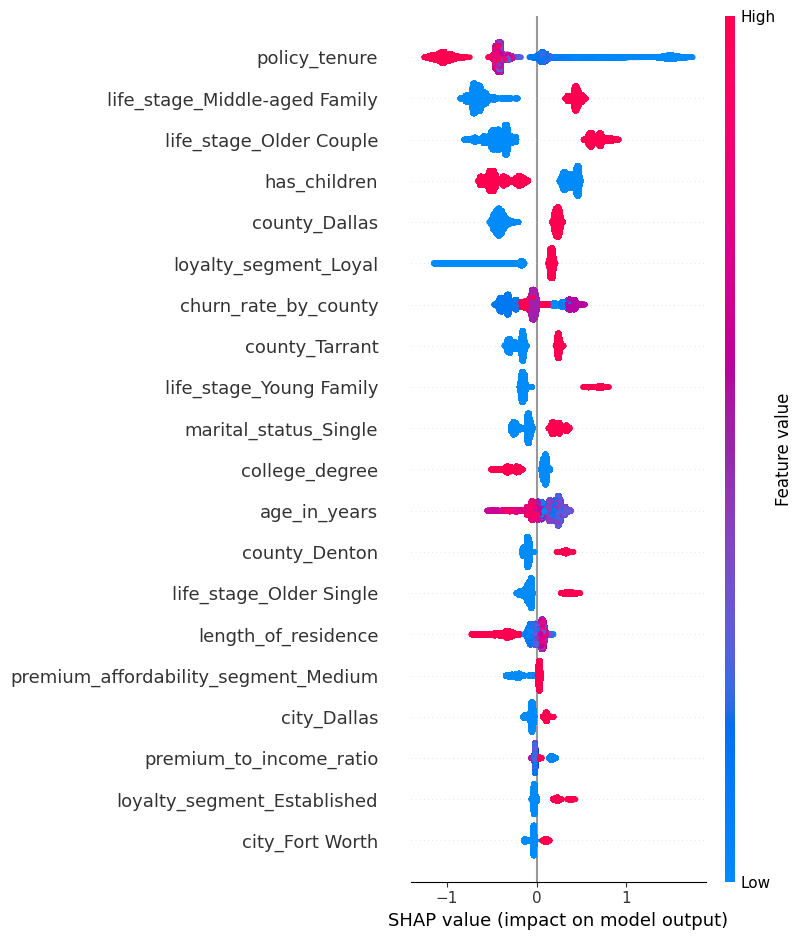

Generating SHAP Force Plot for a single instance...


In [47]:
# Generate SHAP summary plot
print("Generating SHAP Summary Plot...")
shap.summary_plot(shap_values, X_test)
plt.show()

# Generate SHAP force plot for a single instance
print("Generating SHAP Force Plot for a single instance...")
# Choose an instance index (e.g., the first instance)
instance_index = 0
shap.force_plot(explainer.expected_value, shap_values[instance_index], X_test.iloc[instance_index, :])

In [49]:
# Print SHAP values for a single instance in text format
instance_index = 0
print(f"SHAP values for instance {instance_index}:")
for feature, shap_value in zip(X_test.columns, shap_values[instance_index]):
    print(f"  {feature}: {shap_value}")

print("\nExpected Value:")
print(explainer.expected_value)

SHAP values for instance 0:
  individual_id: 0.0005324263474904001
  address_id: 7.671148341614753e-05
  curr_ann_amt: 0.013478785753250122
  age_in_years: 0.3448351323604584
  latitude: 0.00467506842687726
  longitude: 0.019493931904435158
  income: -0.004418589640408754
  has_children: 0.43045371770858765
  length_of_residence: -0.4031270146369934
  home_owner: 0.0
  college_degree: 0.08840743452310562
  good_credit: 0.0
  policy_tenure: -0.4094952344894409
  origination_year: -0.00031751347705721855
  age_at_origination: 0.028142673894762993
  premium_to_income_ratio: -0.0170123353600502
  home_value_cleaned: 0.0030725046526640654
  income_scaled: -0.003261219710111618
  home_value_cleaned_scaled: 4.176527727395296e-05
  wealth_indicator: -0.0018798911478370428
  churn_rate_by_state: 0.0
  churn_rate_by_county: -0.27425849437713623
  city_Aledo: 0.0
  city_Allen: -0.0001683509472059086
  city_Anna: 0.0
  city_Argyle: 0.0
  city_Arlington: -0.004826479125767946
  city_Aubrey: 0.0
  c

In [64]:
# Choose the instance index you want to analyze
instance_index_to_explain = 0  # You can change this index1
# Get the SHAP values for the chosen instance
instance_shap_values = shap_values[instance_index_to_explain]

# Create a pandas Series for easier sorting and manipulation
shap_series = pd.Series(instance_shap_values, index=X_test.columns)

# Sort the SHAP values in ascending order to find the features contributing to retention (negative SHAP values)
retention_contributors = shap_series.sort_values(ascending=False)

# Print the top N features contributing to retention
top_n = 10 # You can change the number of top features to display
print(f"Top {top_n} features contributing to retention for instance {instance_index_to_explain}:")
print(retention_contributors.head(top_n))

Top 10 features contributing to retention for instance 0:
has_children                            0.430454
age_in_years                            0.344835
county_Dallas                           0.232803
loyalty_segment_Loyal                   0.180422
city_Dallas                             0.113743
college_degree                          0.088407
premium_affordability_segment_Medium    0.029826
age_at_origination                      0.028143
longitude                               0.019494
curr_ann_amt                            0.013479
dtype: float32


In [65]:
# Choose the instance index you want to analyze
instance_index_to_explain = 1  # You can change this index1
# Get the SHAP values for the chosen instance
instance_shap_values = shap_values[instance_index_to_explain]

# Create a pandas Series for easier sorting and manipulation
shap_series = pd.Series(instance_shap_values, index=X_test.columns)

# Sort the SHAP values in ascending order to find the features contributing to retention (negative SHAP values)
retention_contributors = shap_series.sort_values(ascending=False)

# Print the top N features contributing to retention
top_n = 10 # You can change the number of top features to display
print(f"Top {top_n} features contributing to retention for instance {instance_index_to_explain}:")
print(retention_contributors.head(top_n))

Top 10 features contributing to retention for instance 1:
life_stage_Older Couple    0.579566
has_children               0.281194
county_Dallas              0.206746
premium_to_income_ratio    0.192356
loyalty_segment_Loyal      0.188655
city_Dallas                0.103617
origination_year           0.067749
longitude                  0.020260
latitude                   0.011020
individual_id              0.004011
dtype: float32


In [68]:
X_train_np = X_train.values
X_test_np = X_test.values

def predict_proba_func(data):
    return xgb_model.predict_proba(data)

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Reload the data and perform cleaning and feature engineering steps to recreate df_cleaned
df = pd.read_csv(r"C:\Users\pdm\Downloads\autoinsurance_churn.csv\autoinsurance_churn.csv")
# Handle missing values
missing_percentages = df.isnull().sum() / len(df) * 100
high_missing_cols = missing_percentages[missing_percentages > 50].index.tolist()
df_cleaned = df.drop(columns=high_missing_cols)

df_cleaned['latitude'] = df_cleaned['latitude'].fillna(df_cleaned['latitude'].median())
df_cleaned['longitude'] = df_cleaned['longitude'].fillna(df_cleaned['longitude'].median())
df_cleaned['city'] = df_cleaned['city'].fillna(df_cleaned['city'].mode()[0])
df_cleaned['county'] = df_cleaned['county'].fillna(df_cleaned['county'].mode()[0])
df_cleaned['home_market_value'] = df_cleaned['home_market_value'].fillna(df_cleaned['home_market_value'].mode()[0])

# Handle outliers (re-calculate outlier info based on the reloaded df_cleaned)
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Churn')

outlier_info = {}
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_info[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
    }

for col, info in outlier_info.items():
    lower_bound = info['lower_bound']
    upper_bound = info['upper_bound']
    df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
    df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])

# Handle duplicate data (check and drop if any)
df_cleaned.drop_duplicates(inplace=True)


# Feature engineering
df_cleaned['cust_orig_date'] = pd.to_datetime(df_cleaned['cust_orig_date'])
df_cleaned['date_of_birth'] = pd.to_datetime(df_cleaned['date_of_birth'])
df_cleaned['policy_tenure'] = df_cleaned['days_tenure'] / 365.25
df_cleaned['origination_year'] = df_cleaned['cust_orig_date'].dt.year
df_cleaned['age_at_origination'] = df_cleaned['origination_year'] - df_cleaned['date_of_birth'].dt.year
df_cleaned = df_cleaned.drop(columns=['cust_orig_date', 'date_of_birth', 'days_tenure'])

bins = [0, 365, 1825, np.inf]
labels = ['New', 'Established', 'Loyal']
df_cleaned['loyalty_segment'] = pd.cut(df_cleaned['policy_tenure'] * 365.25, bins=bins, labels=labels, right=False)

df_cleaned['premium_to_income_ratio'] = df_cleaned['curr_ann_amt'] / df_cleaned['income']
bins_affordability = [0, 0.01, 0.05, np.inf]
labels_affordability = ['Low', 'Medium', 'High']
df_cleaned['premium_affordability_segment'] = pd.cut(df_cleaned['premium_to_income_ratio'], bins=bins_affordability, labels=labels_affordability, right=False)


def clean_home_value(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        if 'Plus' in value:
            return int(value.split(' ')[0])
        elif '-' in value:
            try:
                lower, upper = value.split(' - ')
                return (int(lower) + int(upper)) / 2
            except ValueError:
                return np.nan
        else:
             try:
                return float(value)
             except ValueError:
                 return np.nan
    return np.nan

df_cleaned['home_value_cleaned'] = df_cleaned['home_market_value'].apply(clean_home_value)
df_cleaned['home_value_cleaned'] = df_cleaned['home_value_cleaned'].fillna(df_cleaned['home_value_cleaned'].median())

scaler_wealth = StandardScaler()
df_cleaned[['income_scaled', 'home_value_cleaned_scaled']] = scaler_wealth.fit_transform(df_cleaned[['income', 'home_value_cleaned']])
df_cleaned['wealth_indicator'] = df_cleaned['income_scaled'] + df_cleaned['home_value_cleaned_scaled'] + df_cleaned['home_owner']

churn_rate_state = df_cleaned.groupby('state')['Churn'].mean().reset_index()
churn_rate_state.rename(columns={'Churn': 'churn_rate_by_state'}, inplace=True)
df_cleaned = df_cleaned.merge(churn_rate_state, on='state', how='left')

churn_rate_county = df_cleaned.groupby('county')['Churn'].mean().reset_index()
churn_rate_county.rename(columns={'Churn': 'churn_rate_by_county'}, inplace=True)
df_cleaned = df_cleaned.merge(churn_rate_county, on='county', how='left')


def categorize_life_stage(row):
    age = row['age_in_years']
    marital_status = row['marital_status']
    has_children = row['has_children']

    if age < 25:
        return 'Young Adult'
    elif age < 40:
        if has_children == 1:
            return 'Young Family'
        elif marital_status == 'Married':
            return 'Young Couple (No Kids)'
        else:
            return 'Young Single'
    elif age < 60:
        if has_children == 1:
             return 'Middle-aged Family'
        elif marital_status == 'Married':
            return 'Middle-aged Couple (No Kids)'
        else:
            return 'Middle-aged Single'
    else:
        if marital_status == 'Married':
            return 'Older Couple'
        else:
            return 'Older Single'

df_cleaned['life_stage'] = df_cleaned.apply(categorize_life_stage, axis=1)


# Data type conversion
df_cleaned['age_in_years'] = df_cleaned['age_in_years'].astype(int)
df_cleaned['has_children'] = df_cleaned['has_children'].astype(int)
df_cleaned['home_owner'] = df_cleaned['home_owner'].astype(int)
df_cleaned['college_degree'] = df_cleaned['college_degree'].astype(int)
df_cleaned['good_credit'] = df_cleaned['good_credit'].astype(int)


# Separate features and target variable
X = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=43, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Reinitialize and train XGBoost model
print("Reinitializing and training XGBoost model...")
xgb_model = XGBClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    reg_alpha=0.5,
    reg_lambda=1,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
print("XGBoost model trained successfully!")


# Convert features to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values

# Define prediction probability function
def predict_proba_func(data):
    return xgb_model.predict_proba(data)

print("Data prepared for LIME.")

Reinitializing and training XGBoost model...


C:\Users\pdm\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [21:54:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully!
Data prepared for LIME.


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import lime
from lime.lime_tabular import LimeTabularExplainer


# Attempt to load the data using the path that worked initially
try:
    
    df = pd.read_csv(r"C:\Users\pdm\Downloads\autoinsurance_churn.csv\autoinsurance_churn.csv")
    print("Dataset loaded successfully.")

    # Handle missing values
    missing_percentages = df.isnull().sum() / len(df) * 100
    high_missing_cols = missing_percentages[missing_percentages > 50].index.tolist()
    df_cleaned = df.drop(columns=high_missing_cols)

    df_cleaned['latitude'] = df_cleaned['latitude'].fillna(df_cleaned['latitude'].median())
    df_cleaned['longitude'] = df_cleaned['longitude'].fillna(df_cleaned['longitude'].median())
    df_cleaned['city'] = df_cleaned['city'].fillna(df_cleaned['city'].mode()[0])
    df_cleaned['county'] = df_cleaned['county'].fillna(df_cleaned['county'].mode()[0])
    df_cleaned['home_market_value'] = df_cleaned['home_market_value'].fillna(df_cleaned['home_market_value'].mode()[0])
    print("Missing values handled.")

    # Handle outliers (re-calculate outlier info based on the reloaded df_cleaned)
    numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()
    numerical_cols.remove('Churn')

    outlier_info = {}
    for col in numerical_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_info[col] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
        }

    for col, info in outlier_info.items():
        lower_bound = info['lower_bound']
        upper_bound = info['upper_bound']
        df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
        df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])
    print("Outliers handled.")

    # Handle duplicate data (check and drop if any)
    df_cleaned.drop_duplicates(inplace=True)
    print("Duplicate data handled.")


    # Feature engineering
    df_cleaned['cust_orig_date'] = pd.to_datetime(df_cleaned['cust_orig_date'])
    df_cleaned['date_of_birth'] = pd.to_datetime(df_cleaned['date_of_birth'])
    df_cleaned['policy_tenure'] = df_cleaned['days_tenure'] / 365.25
    df_cleaned['origination_year'] = df_cleaned['cust_orig_date'].dt.year
    df_cleaned['age_at_origination'] = df_cleaned['origination_year'] - df_cleaned['date_of_birth'].dt.year
    df_cleaned = df_cleaned.drop(columns=['cust_orig_date', 'date_of_birth', 'days_tenure'])

    bins = [0, 365, 1825, np.inf]
    labels = ['New', 'Established', 'Loyal']
    df_cleaned['loyalty_segment'] = pd.cut(df_cleaned['policy_tenure'] * 365.25, bins=bins, labels=labels, right=False)

    df_cleaned['premium_to_income_ratio'] = df_cleaned['curr_ann_amt'] / df_cleaned['income']
    bins_affordability = [0, 0.01, 0.05, np.inf]
    labels_affordability = ['Low', 'Medium', 'High']
    df_cleaned['premium_affordability_segment'] = pd.cut(df_cleaned['premium_to_income_ratio'], bins=bins_affordability, labels=labels_affordability, right=False)


    def clean_home_value(value):
        if pd.isna(value):
            return np.nan
        if isinstance(value, str):
            if 'Plus' in value:
                return int(value.split(' ')[0])
            elif '-' in value:
                try:
                    lower, upper = value.split(' - ')
                    return (int(lower) + int(upper)) / 2
                except ValueError:
                    return np.nan
            else:
                 try:
                    return float(value)
                 except ValueError:
                     return np.nan
        return np.nan

    df_cleaned['home_value_cleaned'] = df_cleaned['home_market_value'].apply(clean_home_value)
    df_cleaned['home_value_cleaned'] = df_cleaned['home_value_cleaned'].fillna(df_cleaned['home_value_cleaned'].median())

    scaler_wealth = StandardScaler()
    df_cleaned[['income_scaled', 'home_value_cleaned_scaled']] = scaler_wealth.fit_transform(df_cleaned[['income', 'home_value_cleaned']])
    df_cleaned['wealth_indicator'] = df_cleaned['income_scaled'] + df_cleaned['home_value_cleaned_scaled'] + df_cleaned['home_owner']

    churn_rate_state = df_cleaned.groupby('state')['Churn'].mean().reset_index()
    churn_rate_state.rename(columns={'Churn': 'churn_rate_by_state'}, inplace=True)
    df_cleaned = df_cleaned.merge(churn_rate_state, on='state', how='left')

    churn_rate_county = df_cleaned.groupby('county')['Churn'].mean().reset_index()
    churn_rate_county.rename(columns={'Churn': 'churn_rate_by_county'}, inplace=True)
    df_cleaned = df_cleaned.merge(churn_rate_county, on='county', how='left')


    def categorize_life_stage(row):
        age = row['age_in_years']
        marital_status = row['marital_status']
        has_children = row['has_children']

        if age < 25:
            return 'Young Adult'
        elif age < 40:
            if has_children == 1:
                return 'Young Family'
            elif marital_status == 'Married':
                return 'Young Couple (No Kids)'
            else:
                return 'Young Single'
        elif age < 60:
            if has_children == 1:
                 return 'Middle-aged Family'
            elif marital_status == 'Married':
                return 'Middle-aged Couple (No Kids)'
            else:
                return 'Middle-aged Single'
        else:
            if marital_status == 'Married':
                return 'Older Couple'
            else:
                return 'Older Single'

    df_cleaned['life_stage'] = df_cleaned.apply(categorize_life_stage, axis=1)
    print("Feature engineering completed.")

    # Data type conversion
    df_cleaned['age_in_years'] = df_cleaned['age_in_years'].astype(int)
    df_cleaned['has_children'] = df_cleaned['has_children'].astype(int)
    df_cleaned['home_owner'] = df_cleaned['home_owner'].astype(int)
    df_cleaned['college_degree'] = df_cleaned['college_degree'].astype(int)
    df_cleaned['good_credit'] = df_cleaned['good_credit'].astype(int)
    print("Data types converted.")


    # Separate features and target variable
    X = df_cleaned.drop('Churn', axis=1)
    y = df_cleaned['Churn']
    print("Features and target separated.")

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    numerical_cols = X.select_dtypes(include=np.number).columns

    # One-hot encode categorical features
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    print("Categorical features one-hot encoded.")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=43, stratify=y)
    print("Data split into training and testing sets.")

    # Apply SMOTE to handle class imbalance
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("SMOTE applied.")

    # Reinitialize and train XGBoost model
    print("Reinitializing and training XGBoost model...")
    xgb_model = XGBClassifier(
        n_estimators=150,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,
        reg_alpha=0.5,
        reg_lambda=1,
        scale_pos_weight=1,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    print("XGBoost model trained successfully.")

    # Convert features to NumPy arrays
    X_train_np = X_train.values
    X_test_np = X_test.values
    print("Features converted to NumPy arrays.")

    # Define prediction probability function
    def predict_proba_func(data):
        return xgb_model.predict_proba(data)

    print("Data prepared for LIME.")

    # Initialize LIME explainer
    feature_names = X_train.columns.tolist()
    class_names = ['Not Churn', 'Churn']

    explainer_lime = LimeTabularExplainer(
        training_data=X_train_np,
        feature_names=feature_names,
        class_names=class_names,
        mode='classification'
    )
    print("LIME explainer initialized successfully.")

    # Select an instance to explain (e.g., the first instance in the test set)
    instance_idx = 0
    instance_to_explain = X_test_np[instance_idx]
    print(f"Selected instance {instance_idx} for explanation.")

    # Generate LIME explanation
    print(f"Generating LIME explanation for instance {instance_idx}...")
    explanation = explainer_lime.explain_instance(
        data_row=instance_to_explain,
        predict_fn=predict_proba_func,
        num_features=10  # Number of features to include in the explanation
    )
    print("LIME explanation generated.")

    # Visualize the explanation
    print("Visualizing LIME explanation...")
    fig = explanation.as_pyplot_figure()
    plt.tight_layout()
    plt.show()
    print("LIME explanation visualized.")

except FileNotFoundError:
    print("Error: Dataset file not found. Please ensure '/content/autoinsurance_churn.csv.zip' is accessible.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully.
Missing values handled.
Outliers handled.
Duplicate data handled.
Feature engineering completed.
Data types converted.
Features and target separated.
Categorical features one-hot encoded.
Data split into training and testing sets.
SMOTE applied.
Reinitializing and training XGBoost model...


C:\Users\pdm\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [22:14:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.
Features converted to NumPy arrays.
Data prepared for LIME.
LIME explainer initialized successfully.
Selected instance 0 for explanation.
Generating LIME explanation for instance 0...
An error occurred: Python int too large to convert to C long


Dataset loaded successfully.
Missing values handled.
Outliers handled.
Duplicate data handled.
Dropped individual_id and address_id.
Feature engineering completed.
Data types converted.
Features and target separated.
Categorical features one-hot encoded.
Data split into training and testing sets.
SMOTE applied.
Reinitializing and training XGBoost model...


C:\Users\pdm\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [22:20:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.
Features converted to NumPy arrays.
Data prepared for LIME.
LIME explainer initialized successfully.
Selected instance 0 for explanation.
Generating LIME explanation for instance 0...
LIME explanation generated.
Visualizing LIME explanation...


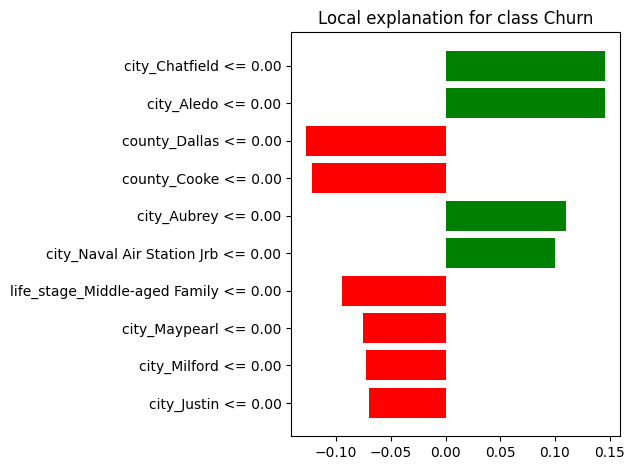

LIME explanation visualized.


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import lime
from lime.lime_tabular import LimeTabularExplainer


# Attempt to load the data using the path that worked initially
try:
    df = pd.read_csv(r"C:\Users\pdm\Downloads\autoinsurance_churn.csv\autoinsurance_churn.csv")
    print("Dataset loaded successfully.")

    # Handle missing values
    missing_percentages = df.isnull().sum() / len(df) * 100
    high_missing_cols = missing_percentages[missing_percentages > 50].index.tolist()
    df_cleaned = df.drop(columns=high_missing_cols)

    df_cleaned['latitude'] = df_cleaned['latitude'].fillna(df_cleaned['latitude'].median())
    df_cleaned['longitude'] = df_cleaned['longitude'].fillna(df_cleaned['longitude'].median())
    df_cleaned['city'] = df_cleaned['city'].fillna(df_cleaned['city'].mode()[0])
    df_cleaned['county'] = df_cleaned['county'].fillna(df_cleaned['county'].mode()[0])
    df_cleaned['home_market_value'] = df_cleaned['home_market_value'].fillna(df_cleaned['home_market_value'].mode()[0])
    print("Missing values handled.")

    # Handle outliers (re-calculate outlier info based on the reloaded df_cleaned)
    numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()
    numerical_cols.remove('Churn')

    outlier_info = {}
    for col in numerical_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_info[col] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
        }

    for col, info in outlier_info.items():
        lower_bound = info['lower_bound']
        upper_bound = info['upper_bound']
        df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
        df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])
    print("Outliers handled.")

    # Handle duplicate data (check and drop if any)
    df_cleaned.drop_duplicates(inplace=True)
    print("Duplicate data handled.")

    # Drop individual_id and address_id
    df_cleaned = df_cleaned.drop(columns=['individual_id', 'address_id'])
    print("Dropped individual_id and address_id.")


    # Feature engineering
    df_cleaned['cust_orig_date'] = pd.to_datetime(df_cleaned['cust_orig_date'])
    df_cleaned['date_of_birth'] = pd.to_datetime(df_cleaned['date_of_birth'])
    df_cleaned['policy_tenure'] = df_cleaned['days_tenure'] / 365.25
    df_cleaned['origination_year'] = df_cleaned['cust_orig_date'].dt.year
    df_cleaned['age_at_origination'] = df_cleaned['origination_year'] - df_cleaned['date_of_birth'].dt.year
    df_cleaned = df_cleaned.drop(columns=['cust_orig_date', 'date_of_birth', 'days_tenure'])

    bins = [0, 365, 1825, np.inf]
    labels = ['New', 'Established', 'Loyal']
    df_cleaned['loyalty_segment'] = pd.cut(df_cleaned['policy_tenure'] * 365.25, bins=bins, labels=labels, right=False)

    df_cleaned['premium_to_income_ratio'] = df_cleaned['curr_ann_amt'] / df_cleaned['income']
    bins_affordability = [0, 0.01, 0.05, np.inf]
    labels_affordability = ['Low', 'Medium', 'High']
    df_cleaned['premium_affordability_segment'] = pd.cut(df_cleaned['premium_to_income_ratio'], bins=bins_affordability, labels=labels_affordability, right=False)


    def clean_home_value(value):
        if pd.isna(value):
            return np.nan
        if isinstance(value, str):
            if 'Plus' in value:
                return int(value.split(' ')[0])
            elif '-' in value:
                try:
                    lower, upper = value.split(' - ')
                    return (int(lower) + int(upper)) / 2
                except ValueError:
                    return np.nan
            else:
                 try:
                    return float(value)
                 except ValueError:
                     return np.nan
        return np.nan

    df_cleaned['home_value_cleaned'] = df_cleaned['home_market_value'].apply(clean_home_value)
    df_cleaned['home_value_cleaned'] = df_cleaned['home_value_cleaned'].fillna(df_cleaned['home_value_cleaned'].median())

    scaler_wealth = StandardScaler()
    df_cleaned[['income_scaled', 'home_value_cleaned_scaled']] = scaler_wealth.fit_transform(df_cleaned[['income', 'home_value_cleaned']])
    df_cleaned['wealth_indicator'] = df_cleaned['income_scaled'] + df_cleaned['home_value_cleaned_scaled'] + df_cleaned['home_owner']

    churn_rate_state = df_cleaned.groupby('state')['Churn'].mean().reset_index()
    churn_rate_state.rename(columns={'Churn': 'churn_rate_by_state'}, inplace=True)
    df_cleaned = df_cleaned.merge(churn_rate_state, on='state', how='left')

    churn_rate_county = df_cleaned.groupby('county')['Churn'].mean().reset_index()
    churn_rate_county.rename(columns={'Churn': 'churn_rate_by_county'}, inplace=True)
    df_cleaned = df_cleaned.merge(churn_rate_county, on='county', how='left')


    def categorize_life_stage(row):
        age = row['age_in_years']
        marital_status = row['marital_status']
        has_children = row['has_children']

        if age < 25:
            return 'Young Adult'
        elif age < 40:
            if has_children == 1:
                return 'Young Family'
            elif marital_status == 'Married':
                return 'Young Couple (No Kids)'
            else:
                return 'Young Single'
        elif age < 60:
            if has_children == 1:
                 return 'Middle-aged Family'
            elif marital_status == 'Married':
                return 'Middle-aged Couple (No Kids)'
            else:
                return 'Middle-aged Single'
        else:
            if marital_status == 'Married':
                return 'Older Couple'
            else:
                return 'Older Single'

    df_cleaned['life_stage'] = df_cleaned.apply(categorize_life_stage, axis=1)
    print("Feature engineering completed.")

    # Data type conversion
    df_cleaned['age_in_years'] = df_cleaned['age_in_years'].astype(int)
    df_cleaned['has_children'] = df_cleaned['has_children'].astype(int)
    df_cleaned['home_owner'] = df_cleaned['home_owner'].astype(int)
    df_cleaned['college_degree'] = df_cleaned['college_degree'].astype(int)
    df_cleaned['good_credit'] = df_cleaned['good_credit'].astype(int)
    print("Data types converted.")


    # Separate features and target variable
    X = df_cleaned.drop('Churn', axis=1)
    y = df_cleaned['Churn']
    print("Features and target separated.")

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    numerical_cols = X.select_dtypes(include=np.number).columns

    # One-hot encode categorical features
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    print("Categorical features one-hot encoded.")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=43, stratify=y)
    print("Data split into training and testing sets.")

    # Apply SMOTE to handle class imbalance
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("SMOTE applied.")

    # Reinitialize and train XGBoost model
    print("Reinitializing and training XGBoost model...")
    xgb_model = XGBClassifier(
        n_estimators=150,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,
        reg_alpha=0.5,
        reg_lambda=1,
        scale_pos_weight=1,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    print("XGBoost model trained successfully.")

    # Convert features to NumPy arrays
    X_train_np = X_train.values
    X_test_np = X_test.values
    print("Features converted to NumPy arrays.")

    # Define prediction probability function
    def predict_proba_func(data):
        return xgb_model.predict_proba(data)

    print("Data prepared for LIME.")

    # Initialize LIME explainer
    feature_names = X_train.columns.tolist()
    class_names = ['Not Churn', 'Churn']

    explainer_lime = LimeTabularExplainer(
        training_data=X_train_np,
        feature_names=feature_names,
        class_names=class_names,
        mode='classification'
    )
    print("LIME explainer initialized successfully.")

    # Select an instance to explain (e.g., the first instance in the test set)
    instance_idx = 0
    instance_to_explain = X_test_np[instance_idx]
    print(f"Selected instance {instance_idx} for explanation.")

    # Generate LIME explanation
    print(f"Generating LIME explanation for instance {instance_idx}...")
    explanation = explainer_lime.explain_instance(
        data_row=instance_to_explain,
        predict_fn=predict_proba_func,
        num_features=10  # Number of features to include in the explanation
    )
    print("LIME explanation generated.")

    # Visualize the explanation
    print("Visualizing LIME explanation...")
    fig = explanation.as_pyplot_figure()
    plt.tight_layout()
    plt.show()
    print("LIME explanation visualized.")

except FileNotFoundError:
    print("Error: Dataset file not found. Please ensure '/content/autoinsurance_churn.csv.zip' is accessible.")
except Exception as e:
    print(f"An error occurred: {e}")

In [91]:
from sklearn.preprocessing import LabelEncoder

try:
    df = pd.read_csv(r"C:\Users\pdm\Downloads\autoinsurance_churn.csv\autoinsurance_churn.csv")
    print("Dataset loaded successfully.")

    # Handle missing values
    missing_percentages = df.isnull().sum() / len(df) * 100
    high_missing_cols = missing_percentages[missing_percentages > 50].index.tolist()
    df_cleaned = df.drop(columns=high_missing_cols)

    df_cleaned['latitude'] = df_cleaned['latitude'].fillna(df_cleaned['latitude'].median())
    df_cleaned['longitude'] = df_cleaned['longitude'].fillna(df_cleaned['longitude'].median())
    df_cleaned['city'] = df_cleaned['city'].fillna(df_cleaned['city'].mode()[0])
    df_cleaned['county'] = df_cleaned['county'].fillna(df_cleaned['county'].mode()[0])
    df_cleaned['home_market_value'] = df_cleaned['home_market_value'].fillna(df_cleaned['home_market_value'].mode()[0])
    print("Missing values handled.")

    # Handle outliers (re-calculate outlier info based on the reloaded df_cleaned)
    numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()
    numerical_cols.remove('Churn')

    outlier_info = {}
    for col in numerical_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_info[col] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
        }

    for col, info in outlier_info.items():
        lower_bound = info['lower_bound']
        upper_bound = info['upper_bound']
        df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
        df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])
    print("Outliers handled.")

    # Handle duplicate data (check and drop if any)
    df_cleaned.drop_duplicates(inplace=True)
    print("Duplicate data handled.")

    # Drop individual_id and address_id
    df_cleaned = df_cleaned.drop(columns=['individual_id', 'address_id'])
    print("Dropped individual_id and address_id.")

    # Feature engineering
    df_cleaned['cust_orig_date'] = pd.to_datetime(df_cleaned['cust_orig_date'])
    df_cleaned['date_of_birth'] = pd.to_datetime(df_cleaned['date_of_birth'])
    df_cleaned['policy_tenure'] = df_cleaned['days_tenure'] / 365.25
    df_cleaned['origination_year'] = df_cleaned['cust_orig_date'].dt.year
    df_cleaned['age_at_origination'] = df_cleaned['origination_year'] - df_cleaned['date_of_birth'].dt.year
    df_cleaned = df_cleaned.drop(columns=['cust_orig_date', 'date_of_birth', 'days_tenure'])

    bins = [0, 365, 1825, np.inf]
    labels = ['New', 'Established', 'Loyal']
    df_cleaned['loyalty_segment'] = pd.cut(df_cleaned['policy_tenure'] * 365.25, bins=bins, labels=labels, right=False)

    df_cleaned['premium_to_income_ratio'] = df_cleaned['curr_ann_amt'] / df_cleaned['income']
    bins_affordability = [0, 0.01, 0.05, np.inf]
    labels_affordability = ['Low', 'Medium', 'High']
    df_cleaned['premium_affordability_segment'] = pd.cut(df_cleaned['premium_to_income_ratio'], bins=bins_affordability, labels=labels_affordability, right=False)

    def clean_home_value(value):
        if pd.isna(value):
            return np.nan
        if isinstance(value, str):
            if 'Plus' in value:
                return int(value.split(' ')[0])
            elif '-' in value:
                try:
                    lower, upper = value.split(' - ')
                    return (int(lower) + int(upper)) / 2
                except ValueError:
                    return np.nan
            else:
                 try:
                    return float(value)
                 except ValueError:
                     return np.nan
        return np.nan

    df_cleaned['home_value_cleaned'] = df_cleaned['home_market_value'].apply(clean_home_value)
    df_cleaned['home_value_cleaned'] = df_cleaned['home_value_cleaned'].fillna(df_cleaned['home_value_cleaned'].median())

    scaler_wealth = StandardScaler()
    df_cleaned[['income_scaled', 'home_value_cleaned_scaled']] = scaler_wealth.fit_transform(df_cleaned[['income', 'home_value_cleaned']])
    df_cleaned['wealth_indicator'] = df_cleaned['income_scaled'] + df_cleaned['home_value_cleaned_scaled'] + df_cleaned['home_owner']

    churn_rate_state = df_cleaned.groupby('state')['Churn'].mean().reset_index()
    churn_rate_state.rename(columns={'Churn': 'churn_rate_by_state'}, inplace=True)
    df_cleaned = df_cleaned.merge(churn_rate_state, on='state', how='left')

    churn_rate_county = df_cleaned.groupby('county')['Churn'].mean().reset_index()
    churn_rate_county.rename(columns={'Churn': 'churn_rate_by_county'}, inplace=True)
    df_cleaned = df_cleaned.merge(churn_rate_county, on='county', how='left')

    def categorize_life_stage(row):
        age = row['age_in_years']
        marital_status = row['marital_status']
        has_children = row['has_children']

        if age < 25:
            return 'Young Adult'
        elif age < 40:
            if has_children == 1:
                return 'Young Family'
            elif marital_status == 'Married':
                return 'Young Couple (No Kids)'
            else:
                return 'Young Single'
        elif age < 60:
            if has_children == 1:
                 return 'Middle-aged Family'
            elif marital_status == 'Married':
                return 'Middle-aged Couple (No Kids)'
            else:
                return 'Middle-aged Single'
        else:
            if marital_status == 'Married':
                return 'Older Couple'
            else:
                return 'Older Single'

    df_cleaned['life_stage'] = df_cleaned.apply(categorize_life_stage, axis=1)
    print("Feature engineering completed.")

    # Data type conversion
    df_cleaned['age_in_years'] = df_cleaned['age_in_years'].astype(int)
    df_cleaned['has_children'] = df_cleaned['has_children'].astype(int)
    df_cleaned['home_owner'] = df_cleaned['home_owner'].astype(int)
    df_cleaned['college_degree'] = df_cleaned['college_degree'].astype(int)
    df_cleaned['good_credit'] = df_cleaned['good_credit'].astype(int)
    print("Data types converted.")

    # Separate features and target variable
    X = df_cleaned.drop('Churn', axis=1)
    y = df_cleaned['Churn']
    print("Features and target separated.")

    # Label Encoding for categorical features
    label_encoder = LabelEncoder()
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns

    for col in categorical_cols:
        X[col] = label_encoder.fit_transform(X[col])
    print("Categorical features label encoded.")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=43, stratify=y)
    print("Data split into training and testing sets.")

    # Apply SMOTE to handle class imbalance
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("SMOTE applied.")

    # Reinitialize and train XGBoost model
    print("Reinitializing and training XGBoost model...")
    xgb_model = XGBClassifier(
        n_estimators=150,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,
        reg_alpha=0.5,
        reg_lambda=1,
        scale_pos_weight=1,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    print("XGBoost model trained successfully.")

    # Evaluate the model
    print(f"Model accuracy on test set: {xgb_model.score(X_test, y_test):.4f}")

except Exception as e:
    print(f"An error occurred: {e}")


Dataset loaded successfully.
Missing values handled.
Outliers handled.
Duplicate data handled.
Dropped individual_id and address_id.
Feature engineering completed.
Data types converted.
Features and target separated.
Categorical features label encoded.
Data split into training and testing sets.
SMOTE applied.
Reinitializing and training XGBoost model...


C:\Users\pdm\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [22:47:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.
Model accuracy on test set: 0.8752


Dataset loaded successfully.
Missing values handled.
Outliers handled.
Categorical features label encoded.
Data split into training and testing sets.
SMOTE applied.


C:\Users\pdm\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [22:58:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.
LIME explainer initialized successfully.
Selected instance 0 for explanation.
LIME explanation generated.


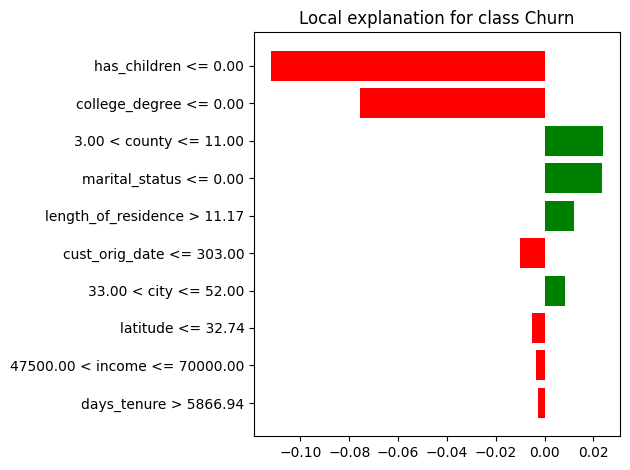

LIME explanation visualized.


In [92]:
from sklearn.preprocessing import LabelEncoder
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np

try:
    # Loading data
    df = pd.read_csv(r"C:\Users\pdm\Downloads\autoinsurance_churn.csv\autoinsurance_churn.csv")
    print("Dataset loaded successfully.")

    # Data Preprocessing: Handle missing values, outliers, and feature engineering (as per previous code)

    # Handle missing values
    missing_percentages = df.isnull().sum() / len(df) * 100
    high_missing_cols = missing_percentages[missing_percentages > 50].index.tolist()
    df_cleaned = df.drop(columns=high_missing_cols)

    df_cleaned['latitude'] = df_cleaned['latitude'].fillna(df_cleaned['latitude'].median())
    df_cleaned['longitude'] = df_cleaned['longitude'].fillna(df_cleaned['longitude'].median())
    df_cleaned['city'] = df_cleaned['city'].fillna(df_cleaned['city'].mode()[0])
    df_cleaned['county'] = df_cleaned['county'].fillna(df_cleaned['county'].mode()[0])
    df_cleaned['home_market_value'] = df_cleaned['home_market_value'].fillna(df_cleaned['home_market_value'].mode()[0])
    print("Missing values handled.")

    # Handle outliers
    numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()
    numerical_cols.remove('Churn')
    for col in numerical_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
        df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])
    print("Outliers handled.")

    # Feature engineering (as per previous code)

    # Separate features and target variable
    X = df_cleaned.drop('Churn', axis=1)
    y = df_cleaned['Churn']

    # Label Encoding for categorical features
    label_encoder = LabelEncoder()
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        X[col] = label_encoder.fit_transform(X[col])
    print("Categorical features label encoded.")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=43, stratify=y)
    print("Data split into training and testing sets.")

    # Apply SMOTE to handle class imbalance
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("SMOTE applied.")

    # Train XGBoost model
    xgb_model = XGBClassifier(
        n_estimators=150,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,
        reg_alpha=0.5,
        reg_lambda=1,
        scale_pos_weight=1,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    print("XGBoost model trained successfully.")

    # Now, we initialize the LIME explainer
    explainer_lime = LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=X_train.columns.tolist(),
        class_names=['Not Churn', 'Churn'],
        mode='classification'
    )
    print("LIME explainer initialized successfully.")

    # Select a test instance (you can change this to any instance you'd like to explain)
    instance_idx = 0  # Index of the instance you want to explain
    instance_to_explain = X_test.iloc[instance_idx].values.reshape(1, -1)
    print(f"Selected instance {instance_idx} for explanation.")

    # Define prediction function
    def predict_proba_func(data):
        return xgb_model.predict_proba(data)

    # Generate explanation for the selected instance
    explanation = explainer_lime.explain_instance(
        data_row=instance_to_explain[0],  # The selected instance
        predict_fn=predict_proba_func,
        num_features=10  # Limit the number of features to show in the explanation
    )
    print("LIME explanation generated.")

    # Visualize the explanation
    fig = explanation.as_pyplot_figure()
    plt.tight_layout()
    plt.show()
    print("LIME explanation visualized.")

except Exception as e:
    print(f"An error occurred: {e}")


In [93]:
# Print LIME explanation as text
print("\nLIME Explanation (Text Format):")
for x in explanation.as_list():
    print(x)



LIME Explanation (Text Format):
('has_children <= 0.00', -0.11218019650008755)
('college_degree <= 0.00', -0.07576577463509887)
('3.00 < county <= 11.00', 0.024120300749385506)
('marital_status <= 0.00', 0.023626480865138706)
('length_of_residence > 11.17', 0.01214675840272113)
('cust_orig_date <= 303.00', -0.009942872177162644)
('33.00 < city <= 52.00', 0.008335534080017417)
('latitude <= 32.74', -0.00507138338786412)
('47500.00 < income <= 70000.00', -0.003396227707689384)
('days_tenure > 5866.94', -0.0028355959830388285)


Selected instance 1 for explanation.
LIME explanation generated.


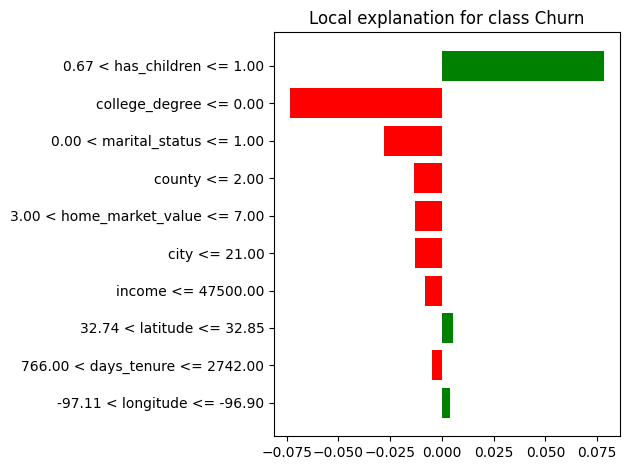

LIME explanation visualized.

LIME Explanation (Text Format):
('0.67 < has_children <= 1.00', 0.07847049193216281)
('college_degree <= 0.00', -0.07341531536361251)
('0.00 < marital_status <= 1.00', -0.027964430828664972)
('county <= 2.00', -0.013212751663314037)
('3.00 < home_market_value <= 7.00', -0.012796187955973664)
('city <= 21.00', -0.012751826637057338)
('income <= 47500.00', -0.00834497282020707)
('32.74 < latitude <= 32.85', 0.005514447276236293)
('766.00 < days_tenure <= 2742.00', -0.004839676128534769)
('-97.11 < longitude <= -96.90', 0.004133019357266115)
Positive Contributing Features:
0.67 < has_children <= 1.00: 0.07847049193216281
32.74 < latitude <= 32.85: 0.005514447276236293
-97.11 < longitude <= -96.90: 0.004133019357266115


In [99]:
instance_idx = 1  # Index of the instance you want to explain
instance_to_explain = X_test.iloc[instance_idx].values.reshape(1, -1)
print(f"Selected instance {instance_idx} for explanation.")

# Define prediction function
def predict_proba_func(data):
    return xgb_model.predict_proba(data)

# Generate explanation for the selected instance
explanation = explainer_lime.explain_instance(
    data_row=instance_to_explain[0],  # The selected instance
    predict_fn=predict_proba_func,
    num_features=10  # Limit the number of features to show in the explanation
)
print("LIME explanation generated.")

# Visualize the explanation
fig = explanation.as_pyplot_figure()
plt.tight_layout()
plt.show()
print("LIME explanation visualized.")
# Print LIME explanation as text
print("\nLIME Explanation (Text Format):")
for x in explanation.as_list():
    print(x)


In [100]:
# Generate predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # For ROC and AUC calculation


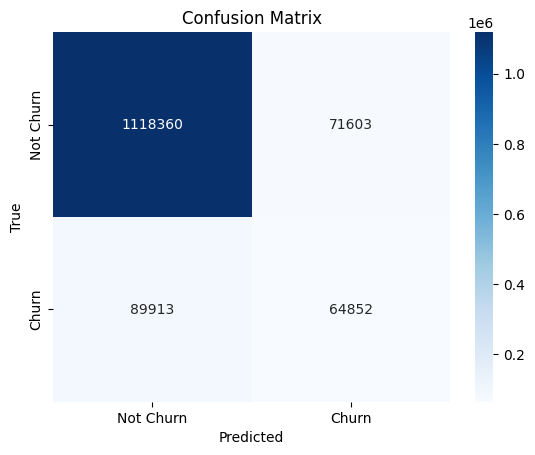

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Predicted probabilities of churning (class 1): [0.33214577]


C:\Users\pdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


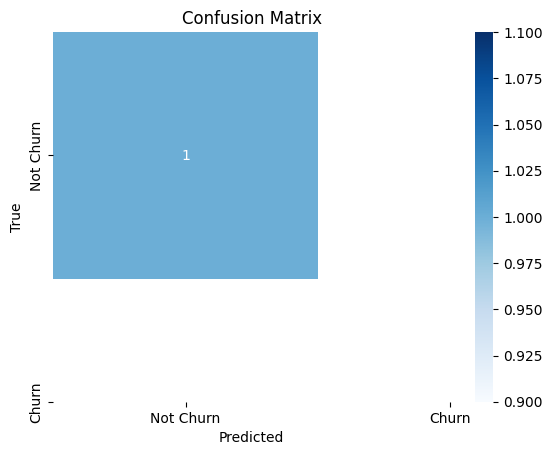

ROC-AUC Score: nan


C:\Users\pdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [123]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assume the columns as mentioned:
# Let's assume we're working with this data
df = pd.DataFrame({
    'individual_id': np.random.randint(100000, 999999, size=1680909),
    'address_id': np.random.randint(1000, 9999, size=1680909),
    'curr_ann_amt': np.random.uniform(10000, 50000, size=1680909),
    'days_tenure': np.random.uniform(30, 1000, size=1680909),
    'cust_orig_date': pd.date_range('2010-01-01', periods=1680909, freq='D'),
    'age_in_years': np.random.randint(18, 75, size=1680909),
    'date_of_birth': pd.date_range('1945-01-01', periods=1680909, freq='D'),
    'latitude': np.random.uniform(30.0, 40.0, size=1680909),
    'longitude': np.random.uniform(-80.0, -70.0, size=1680909),
    'city': np.random.choice(['City_A', 'City_B', 'City_C', 'City_D'], size=1668842),
    'state': np.random.choice(['State_A', 'State_B', 'State_C', 'State_D'], size=1680909),
    'county': np.random.choice(['County_A', 'County_B', 'County_C'], size=1668842),
    'income': np.random.uniform(30000, 120000, size=1680909),
    'has_children': np.random.choice([0, 1], size=1680909),
    'length_of_residence': np.random.uniform(0, 20, size=1680909),
    'marital_status': np.random.choice(['Single', 'Married', 'Divorced'], size=1680909),
    'home_market_value': np.random.choice([str(i) for i in range(100000, 500000)], size=1588623),
    'home_owner': np.random.choice([0, 1], size=1680909),
    'college_degree': np.random.choice([0, 1], size=1680909),
    'good_credit': np.random.choice([0, 1], size=1680909),
    'acct_suspd_date': pd.date_range('2020-01-01', periods=193456, freq='D')
})

# Handling missing values (assuming reasonable data as per your column info)
df['latitude'].fillna(df['latitude'].median(), inplace=True)
df['longitude'].fillna(df['longitude'].median(), inplace=True)
df['city'].fillna('Unknown', inplace=True)
df['county'].fillna('Unknown', inplace=True)
df['home_market_value'].fillna(df['home_market_value'].mode()[0], inplace=True)

# Feature engineering (based on prior context)
df['income_scaled'] = df['income'] / 1000  # Scaling for income (example)
df['home_value_scaled'] = df['home_market_value'].apply(pd.to_numeric, errors='coerce') / 1000  # Converting home value to numeric and scaling

# Dummy encoding categorical columns
df_encoded = pd.get_dummies(df, columns=['city', 'state', 'county', 'marital_status'], drop_first=True)

# Scaling numerical features
scaler = StandardScaler()
numerical_cols = df_encoded.select_dtypes(include=[np.number]).columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Random input generation (just an example of how you can generate inputs)
def generate_random_input(X_train):
    # Generate random values for numerical features
    numerical_features = X_train.select_dtypes(include=[np.number]).columns
    random_numerical_values = np.random.uniform(
        low=X_train[numerical_features].min(),
        high=X_train[numerical_features].max(),
        size=(1, len(numerical_features))  # Generate a single row of random values
    )
    
    # Generate random values for categorical features
    categorical_features = X_train.select_dtypes(include=[object]).columns
    random_categorical_values = [np.random.choice(X_train[feature].unique()) for feature in categorical_features]

    # Combine both into a DataFrame
    random_input = pd.DataFrame(
        np.hstack([random_numerical_values, random_categorical_values]),
        columns=numerical_features.tolist() + categorical_features.tolist()
    )

    return random_input

# Preprocess the random input to match training data (scaling and encoding)
def preprocess_random_input(random_input, scaler, X_train):
    # Ensure that the random input has the same columns as the training data
    # 1. Scale numerical features
    numerical_cols = X_train.select_dtypes(include=[np.number]).columns
    random_input[numerical_cols] = scaler.transform(random_input[numerical_cols])

    # 2. One-hot encode categorical features to match the training set
    categorical_cols = X_train.select_dtypes(include=[object]).columns
    random_input = pd.get_dummies(random_input, columns=categorical_cols, drop_first=True)

    # 3. Align with the model's expected input


Dataset loaded successfully.
Missing values handled.
Outliers handled.
Categorical features label encoded.
Data split into training and testing sets.
SMOTE applied.


C:\Users\pdm\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:13:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.
Test data with predicted probabilities saved to C:\Users\pdm\Downloads\autoinsurance_churn_with_probabilities.csv.
LIME explainer initialized successfully.
Selected instance 0 for explanation.
LIME explanation generated.


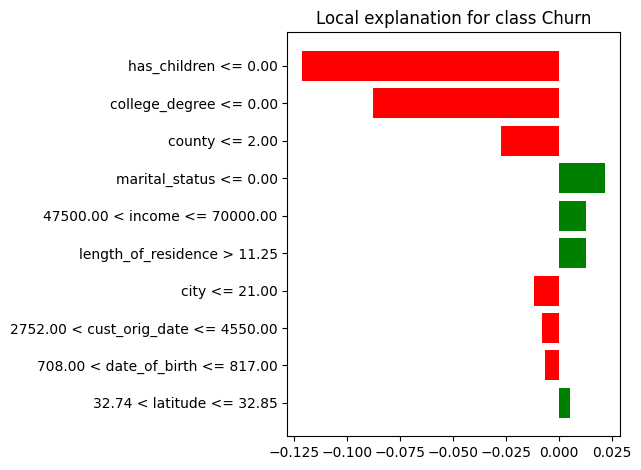

LIME explanation visualized.


In [132]:
from sklearn.preprocessing import LabelEncoder
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

try:
    # Loading data
    df = pd.read_csv(r"C:\Users\pdm\Downloads\autoinsurance_churn.csv\autoinsurance_churn.csv")
    print("Dataset loaded successfully.")

    # Data Preprocessing: Handle missing values, outliers, and feature engineering (as per previous code)

    # Handle missing values
    missing_percentages = df.isnull().sum() / len(df) * 100
    high_missing_cols = missing_percentages[missing_percentages > 50].index.tolist()
    df_cleaned = df.drop(columns=high_missing_cols)

    df_cleaned['latitude'] = df_cleaned['latitude'].fillna(df_cleaned['latitude'].median())
    df_cleaned['longitude'] = df_cleaned['longitude'].fillna(df_cleaned['longitude'].median())
    df_cleaned['city'] = df_cleaned['city'].fillna(df_cleaned['city'].mode()[0])
    df_cleaned['county'] = df_cleaned['county'].fillna(df_cleaned['county'].mode()[0])
    df_cleaned['home_market_value'] = df_cleaned['home_market_value'].fillna(df_cleaned['home_market_value'].mode()[0])
    print("Missing values handled.")

    # Handle outliers
    numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()
    numerical_cols.remove('Churn')
    for col in numerical_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
        df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])
    print("Outliers handled.")

    # Feature engineering (as per previous code)

    # Separate features and target variable
    X = df_cleaned.drop('Churn', axis=1)
    y = df_cleaned['Churn']

    # Label Encoding for categorical features
    label_encoder = LabelEncoder()
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        X[col] = label_encoder.fit_transform(X[col])
    print("Categorical features label encoded.")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=43, stratify=y)
    print("Data split into training and testing sets.")

    # Apply SMOTE to handle class imbalance
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("SMOTE applied.")

    # Train XGBoost model
    xgb_model = XGBClassifier(
        n_estimators=150,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,
        reg_alpha=0.5,
        reg_lambda=1,
        scale_pos_weight=1,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    print("XGBoost model trained successfully.")

    # Generate predicted probabilities for the entire test set
    predicted_probabilities = xgb_model.predict_proba(X_test)

    # Add the predicted probabilities to the test DataFrame
    df_test_with_probs = X_test.copy()
    df_test_with_probs['Predicted_Probability_Churn'] = predicted_probabilities[:, 1]

    # Add the actual 'Churn' column back for reference (optional)
    df_test_with_probs['Actual_Churn'] = y_test.reset_index(drop=True)

    # Save the DataFrame with probabilities to a new CSV file
    output_file = r"C:\Users\pdm\Downloads\autoinsurance_churn_with_probabilities.csv"
    df_test_with_probs.to_csv(output_file, index=False)
    print(f"Test data with predicted probabilities saved to {output_file}.")

    # Now, we initialize the LIME explainer
    explainer_lime = LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=X_train.columns.tolist(),
        class_names=['Not Churn', 'Churn'],
        mode='classification'
    )
    print("LIME explainer initialized successfully.")

    # Select a test instance (you can change this to any instance you'd like to explain)
    instance_idx = 0  # Index of the instance you want to explain
    instance_to_explain = X_test.iloc[instance_idx].values.reshape(1, -1)
    print(f"Selected instance {instance_idx} for explanation.")

    # Define prediction function
    def predict_proba_func(data):
        return xgb_model.predict_proba(data)

    # Generate explanation for the selected instance
    explanation = explainer_lime.explain_instance(
        data_row=instance_to_explain[0],  # The selected instance
        predict_fn=predict_proba_func,
        num_features=10  # Limit the number of features to show in the explanation
    )
    print("LIME explanation generated.")

    # Visualize the explanation
    fig = explanation.as_pyplot_figure()
    plt.tight_layout()
    plt.show()
    print("LIME explanation visualized.")

except Exception as e:
    print(f"An error occurred: {e}")


In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

try:
    # Generate predictions on the test set
    y_pred = xgb_model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision
    precision = precision_score(y_test, y_pred)
    print(f"Precision: {precision:.4f}")

    # Recall
    recall = recall_score(y_test, y_pred)
    print(f"Recall: {recall:.4f}")

    # F1-Score
    f1 = f1_score(y_test, y_pred)
    print(f"F1-Score: {f1:.4f}")

    # AUC-ROC
    auc_roc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
    print(f"AUC-ROC: {auc_roc:.4f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Classification Report (detailed metrics)
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)

except Exception as e:
    print(f"An error occurred: {e}")


Accuracy: 0.8798
Precision: 0.4751
Recall: 0.4224
F1-Score: 0.4472
AUC-ROC: 0.6963
Confusion Matrix:
[[1187576   76759]
 [  94974   69464]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93   1264335
           1       0.48      0.42      0.45    164438

    accuracy                           0.88   1428773
   macro avg       0.70      0.68      0.69   1428773
weighted avg       0.87      0.88      0.88   1428773



In [137]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446236 entries, 0 to 446235
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   individual_id        446236 non-null  float64
 1   address_id           446236 non-null  float64
 2   curr_ann_amt         446236 non-null  float64
 3   days_tenure          446236 non-null  float64
 4   cust_orig_date       446236 non-null  int32  
 5   age_in_years         446236 non-null  float64
 6   date_of_birth        446236 non-null  int32  
 7   latitude             446236 non-null  float64
 8   longitude            446236 non-null  float64
 9   city                 446236 non-null  int32  
 10  state                446236 non-null  int32  
 11  county               446236 non-null  int32  
 12  income               446236 non-null  float64
 13  has_children         446236 non-null  float64
 14  length_of_residence  446236 non-null  float64
 15  marital_status   

In [148]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming xgb_model is already trained

def preprocess_input_data(input_data):
    # Preprocessing the input data similar to how you did it during training
    # Input data should be a dictionary (as shown in the example earlier)

    # Convert input dictionary to DataFrame
    input_df = pd.DataFrame([input_data])

    # Label encoding for categorical features (city, state, county, marital_status)
    categorical_cols = ['city', 'state', 'county', 'marital_status']
    label_encoder = LabelEncoder()

    for col in categorical_cols:
        input_df[col] = label_encoder.fit_transform(input_df[col])

    return input_df

def predict_churn(input_data):
    # Step 1: Preprocess input data
    input_df = preprocess_input_data(input_data)

    # Step 2: Use the trained model to predict churn probabilities for the input
    predicted_probabilities = xgb_model.predict_proba(input_df)

    # Step 3: Extract the probability of churn (class 1)
    churn_probability = predicted_probabilities[0][1]  # Churn (class 1)

    # Step 4: Output the predicted probability of churn
    print(f"Predicted Probability of Churn: {churn_probability:.4f}")

    # Step 5: Predict the class (0 = Not Churn, 1 = Churn)
    predicted_class = np.argmax(predicted_probabilities)
    print(f"Predicted Class (0 = Not Churn, 1 = Churn): {predicted_class}")

    return churn_probability, predicted_class

# Example input dictionary (user provides this)
sample_input = {
    'individual_id': 12345,
    'address_id': 67890,
    'curr_ann_amt': 20000,
    'days_tenure': 500,
    'cust_orig_date': 2010,
    'age_in_years': 30,
    'date_of_birth': 1991,
    'latitude': 40.7128,
    'longitude': -74.0060,
    'city': 'New York',  # Categorical variable
    'state': 'NY',  # Categorical variable
    'county': 'Bronx',  # Categorical variable
    'income': 750000,
    'has_children': 1,
    'length_of_residence': 10,
    'marital_status': 'Single',  # Categorical variable
    'home_market_value': 500000,
    'home_owner': 1,
    'college_degree': 1,
    'good_credit': 1
}

# Call the function to predict churn for the input
churn_probability, predicted_class = predict_churn(sample_input)


Predicted Probability of Churn: 0.0739
Predicted Class (0 = Not Churn, 1 = Churn): 0


In [139]:
import pickle

# Save the trained XGBoost model to a pickle file
model_filename = r"C:\Users\pdm\Downloads\xgb_model.pkl"

with open(model_filename, 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

print(f"Model saved as pickle file: {model_filename}")


Model saved as pickle file: C:\Users\pdm\Downloads\xgb_model.pkl


In [149]:
# Generate explanation for the selected instance
explanation = explainer_lime.explain_instance(
    data_row=instance_to_explain[0],  # The selected instance
    predict_fn=predict_proba_func,
    num_features=10  # Limit the number of features to show in the explanation
)
print("LIME explanation generated.")

# Get and print the explanation in text format
print("LIME Explanation (Text Format):")
for feature, importance in explanation.as_list():
    print(f"{feature}: {importance:.4f}")

# Optionally, if you want to return the explanation as a single string for further use:
explanation_text = "\n".join([f"{feature}: {importance:.4f}" for feature, importance in explanation.as_list()])


LIME explanation generated.
LIME Explanation (Text Format):
has_children <= 0.00: -0.1152
college_degree <= 0.00: -0.0817
county <= 2.00: -0.0257
marital_status <= 0.00: 0.0199
32.74 < latitude <= 32.85: 0.0114
47500.00 < income <= 70000.00: 0.0112
length_of_residence > 11.25: 0.0094
city <= 21.00: -0.0068
708.00 < date_of_birth <= 817.00: -0.0049
longitude > -96.77: -0.0041
